# **Project:** Demand and Supply Gap Analysis

## Objective:
The goal of this analysis was to identify gaps between Contracted Hours, Allocated Hours, and
Remaining for each employee in every region. The insights gained from this gap analysis would
help optimize resource allocation and improve efficiency in each region.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset and copying

In [2]:
#Reading the dataset
df = pd.read_excel('Demand Management Dataset.xlsx',
                   sheet_name=['Central USA','Lat_Pa','AF','MEA','MER','CSE','Subsaharan','F_east'],
                   header=2)

In [3]:
#Creating seperate dataframes for each worksheet/region
Central_USA = df['Central USA'].copy()
Lat_Pa = df['Lat_Pa'].copy()
AF = df['AF'].copy()
MEA = df['MEA'].copy()
MER = df['MER'].copy()
CSE = df['CSE'].copy()
Subsaharan = df['Subsaharan'].copy()
F_east = df['F_east'].copy()
Employee_Dept = pd.read_excel('Demand Management Dataset.xlsx', sheet_name='Employee Dept',
                              header= 1)
Employee_HR_Cost = pd.read_excel('Demand Management Dataset.xlsx', sheet_name='Employee HR Cost',
                              header= 1)

## Data Validation:

### **Data Validation:** Region `Lat_Pa`

In [4]:
#Reading Lat_Pa Dataset
Lat_Pa.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.00,150.0,172.5,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
2,Allocated Hours,NaN,NaN,165.0,157.5,155.63,148.5,85.5,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Remaining,NaN,NaN,0.0,0.0,-5.63,1.5,87.0,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0
4,Technical,TASK_T0046,Completed,165.0,157.5,150.00,105.0,69.0,60.00,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0


### The dataset consists of 3 dimensional tables, Yet, It would be easier to work with 2 dimensional tables, Hence we will transform the tables to 2 dimentional tables.

In [5]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
Lat_Pa['EMP'] = np.where(Lat_Pa['DIM'].str.contains('EMP'), Lat_Pa['DIM'], np.nan)
Lat_Pa['EMP'] = Lat_Pa['EMP'].fillna(method='ffill')
Lat_Pa = Lat_Pa[~Lat_Pa['DIM'].str.contains('EMP', na=False)]
Lat_Pa = Lat_Pa[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [6]:
#Dropping duplicates on a row level
Lat_Pa = Lat_Pa.drop_duplicates(keep='first')

In [7]:
#Validating the changes
Lat_Pa.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,EMP_0245,Allocated Hours,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,EMP_0245,Remaining,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,EMP_0245,Technical,165.0,157.5,150.00,105.0,69.00,60.00,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0046,Completed
5,EMP_0245,Technical,0.0,0.0,0.00,22.5,9.38,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0288,Completed


In [8]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
Lat_Pa.set_index('EMP',inplace=True)
Lat_Pa_Hours = Lat_Pa[Lat_Pa['DIM'].isin(['Contracted Hours','Allocated Hours'])]
Lat_Pa_Hours = Lat_Pa_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [9]:
Lat_Pa_Remaining = Lat_Pa[Lat_Pa['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [10]:
#Dropping any duplicate values on an indicies level
Lat_Pa_Remaining = Lat_Pa_Remaining[~Lat_Pa_Remaining.index.duplicated(keep='first')]
Lat_Pa_Hours = Lat_Pa_Hours[~Lat_Pa_Hours.index.duplicated(keep='first')]

In [11]:
#Comparing the 2 dataset values
abs(Lat_Pa_Remaining) == abs(Lat_Pa_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0245,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0330,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0282,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0490,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0265,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0137,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0732,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0486,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [12]:
#Figuring out if there are duplicates on a row level
Lat_Pa.reset_index().duplicated().sum()

0

#### **Note:** The original `Remaining` value is the same as the `Remaining` we've just calculated.



---


### **Data Validation:** Region `Central USA`

In [13]:
#Reading Central_USA Dataset
Central_USA.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
2,Allocated Hours,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Remaining,NaN,NaN,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
4,EMP_0768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
Central_USA['EMP'] = np.where(Central_USA['DIM'].str.contains('EMP'), Central_USA['DIM'], np.nan)
Central_USA['EMP'] = Central_USA['EMP'].fillna(method='ffill')
Central_USA = Central_USA[~Central_USA['DIM'].str.contains('EMP', na=False)]
Central_USA = Central_USA[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [15]:
#Dropping duplicates on a row level
Central_USA = Central_USA.drop_duplicates(keep='first') 

In [16]:
#Validating the changes
Central_USA.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0244,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,EMP_0244,Allocated Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,EMP_0244,Remaining,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
5,EMP_0768,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
6,EMP_0768,Allocated Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [17]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
Central_USA.set_index('EMP',inplace=True)
Central_USA_Hours = Central_USA[Central_USA['DIM'].isin(['Contracted Hours','Allocated Hours'])]
Central_USA_Hours = Central_USA_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [18]:
Central_USA_Remaining = Central_USA[Central_USA['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [19]:
#Dropping any duplicate values on an indicies level
Central_USA_Remaining = Central_USA_Remaining[~Central_USA_Remaining.index.duplicated(keep='first')]
Central_USA_Hours = Central_USA_Hours[~Central_USA_Hours.index.duplicated(keep='first')]

In [20]:
#Comparing the 2 dataset values
abs(Central_USA_Remaining) == abs(Central_USA_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0244,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0768,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0405,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0490,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0431,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0274,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0189,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0795,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [21]:
#Figuring out if there are duplicates on a row level
Central_USA.reset_index().duplicated().sum()

0



---


### **Data Validation:** Region `AF`

In [22]:
#Reading AF Dataset
AF.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
2,Allocated Hours,NaN,NaN,178.2,170.1,162.0,222.0,186.3,162.0,162.0,178.2,170.1,186.3,178.2,170.1,178.2,162.0,0.0,0.0
3,Remaining,NaN,NaN,-13.2,-12.6,-12.0,-72.0,-13.8,-12.0,-12.0,-13.2,-12.6,-13.8,-13.2,-12.6,-13.2,-12.0,157.5,150.0
4,Technical,TASK_T0690,Completed,165.0,157.5,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
AF['EMP'] = np.where(AF['DIM'].str.contains('EMP'), AF['DIM'], np.nan)
AF['EMP'] = AF['EMP'].fillna(method='ffill')
AF = AF[~AF['DIM'].str.contains('EMP', na=False)]
AF = AF[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [24]:
#Dropping duplicates on a row level
AF = AF.drop_duplicates(keep='first')

In [25]:
#Validating the changes
AF.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0431,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,EMP_0431,Allocated Hours,178.2,170.1,162.0,222.0,186.3,162.0,162.0,178.2,170.1,186.3,178.2,170.1,178.2,162.0,0.0,0.0,NaN,NaN
3,EMP_0431,Remaining,-13.2,-12.6,-12.0,-72.0,-13.8,-12.0,-12.0,-13.2,-12.6,-13.8,-13.2,-12.6,-13.2,-12.0,157.5,150.0,NaN,NaN
4,EMP_0431,Technical,165.0,157.5,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0690,Completed
5,EMP_0431,Technical,0.0,0.0,0.0,0.0,142.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,0.0,0.0,TASK_T0010,Completed


In [26]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
AF.set_index('EMP',inplace=True)
AF_Hours = AF[AF['DIM'].isin(['Contracted Hours','Allocated Hours'])]
AF_Hours = AF_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [27]:
AF_Remaining = AF[AF['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [28]:
#Dropping any duplicate values on an indicies level
AF_Remaining = AF_Remaining[~AF_Remaining.index.duplicated(keep='first')]
AF_Hours = AF_Hours[~AF_Hours.index.duplicated(keep='first')]

In [29]:
#Comparing the 2 dataset values
abs(AF_Remaining) == abs(AF_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0431,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0094,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0265,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0469,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0484,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0214,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0274,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0169,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [30]:
#Figuring out if there are duplicates on a row level
AF.reset_index().duplicated().sum()

0



---


### **Data Validation:** Region `MEA`

In [31]:
#Reading MEA Dataset
MEA.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.0,150.0,172.5,150.0,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.00,157.50,150.00
2,Allocated Hours,NaN,NaN,46.2,44.1,0.0,0.0,0.0,0.0,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44
3,Remaining,NaN,NaN,118.8,113.4,150.0,150.0,172.5,150.0,115.03,36.76,35.09,38.43,36.76,35.09,36.76,33.42,35.09,62.56
4,Technical,TASK_T0562,Completed,0.0,0.0,0.0,0.0,0.0,0.0,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44


In [32]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
MEA['EMP'] = np.where(MEA['DIM'].str.contains('EMP'), MEA['DIM'], np.nan)
MEA['EMP'] = MEA['EMP'].fillna(method='ffill')
MEA = MEA[~MEA['DIM'].str.contains('EMP', na=False)]
MEA = MEA[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [33]:
#Dropping duplicates on a row level
MEA = MEA.drop_duplicates(keep='first')

In [34]:
#Validating the changes
MEA.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0002,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
2,EMP_0002,Allocated Hours,46.2,44.1,0.0,0.0,0.0,0.0,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44,NaN,NaN
3,EMP_0002,Remaining,118.8,113.4,150.0,150.0,172.5,150.0,115.03,36.76,35.09,38.43,36.76,35.09,36.76,33.42,35.09,62.56,NaN,NaN
4,EMP_0002,Technical,0.0,0.0,0.0,0.0,0.0,0.0,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44,TASK_T0562,Completed
5,EMP_0002,Technical,46.2,44.1,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,TASK_T0428,Completed


In [35]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
MEA.set_index('EMP',inplace=True)
MEA_Hours = MEA[MEA['DIM'].isin(['Contracted Hours','Allocated Hours'])]
MEA_Hours = MEA_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [36]:
MEA_Remaining = MEA[MEA['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [37]:
#Dropping any duplicate values on an indicies level
MEA_Remaining = MEA_Remaining[~MEA_Remaining.index.duplicated(keep='first')]
MEA_Hours = MEA_Hours[~MEA_Hours.index.duplicated(keep='first')]

In [38]:
#Comparing the 2 dataset values
abs(MEA_Remaining) == abs(MEA_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0002,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0282,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0094,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0489,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0406,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0202,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0465,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0570,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [39]:
#Figuring out if there are duplicates on a row level
MEA.reset_index().duplicated().sum()

0



---


### **Data Validation:** Region `MER`

In [40]:
#Reading MER Dataset
MER.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
2,Allocated Hours,NaN,NaN,178.2,170.1,162.0,222.0,186.3,162.0,162.0,178.2,170.1,186.3,178.2,170.1,178.2,162.0,0.0,0.0
3,Remaining,NaN,NaN,-13.2,-12.6,-12.0,-72.0,-13.8,-12.0,-12.0,-13.2,-12.6,-13.8,-13.2,-12.6,-13.2,-12.0,157.5,150.0
4,Technical,TASK_T0958,Completed,13.2,12.6,12.0,12.0,13.8,12.0,12.0,13.2,12.6,13.8,13.2,12.6,13.2,12.0,0.0,0.0


In [41]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
MER['EMP'] = np.where(MER['DIM'].str.contains('EMP'), MER['DIM'], np.nan)
MER['EMP'] = MER['EMP'].fillna(method='ffill')
MER = MER[~MER['DIM'].str.contains('EMP', na=False)]
MER = MER[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [42]:
#Dropping duplicates on a row level
MER = MER.drop_duplicates(keep='first')

In [43]:
#Validating the changes
MER.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0431,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,EMP_0431,Allocated Hours,178.2,170.1,162.0,222.0,186.3,162.0,162.0,178.2,170.1,186.3,178.2,170.1,178.2,162.0,0.0,0.0,NaN,NaN
3,EMP_0431,Remaining,-13.2,-12.6,-12.0,-72.0,-13.8,-12.0,-12.0,-13.2,-12.6,-13.8,-13.2,-12.6,-13.2,-12.0,157.5,150.0,NaN,NaN
4,EMP_0431,Technical,13.2,12.6,12.0,12.0,13.8,12.0,12.0,13.2,12.6,13.8,13.2,12.6,13.2,12.0,0.0,0.0,TASK_T0958,Completed
5,EMP_0431,Technical,165.0,157.5,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0690,Completed


In [44]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
MER.set_index('EMP',inplace=True)
MER_Hours = MER[MER['DIM'].isin(['Contracted Hours','Allocated Hours'])]
MER_Hours = MER_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [45]:
MER_Remaining = MER[MER['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [46]:
#Dropping any duplicate values on an indicies level
MER_Remaining = MER_Remaining[~MER_Remaining.index.duplicated(keep='first')]
MER_Hours = MER_Hours[~MER_Hours.index.duplicated(keep='first')]

In [47]:
#Comparing the 2 dataset values
abs(MER_Remaining) == abs(MER_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0431,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0265,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0004,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0489,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0657,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0249,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0363,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0169,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [48]:
#Figuring out if there are duplicates on a row level
MER.reset_index().duplicated().sum()

0



---


### **Data Validation:** Region `CSE`

In [49]:
#Reading CSE Dataset
CSE.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
2,Allocated Hours,NaN,NaN,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Remaining,NaN,NaN,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0
4,Technical,TASK_T0471,Completed,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
CSE['EMP'] = np.where(CSE['DIM'].str.contains('EMP'), CSE['DIM'], np.nan)
CSE['EMP'] = CSE['EMP'].fillna(method='ffill')
CSE = CSE[~CSE['DIM'].str.contains('EMP', na=False)]
CSE = CSE[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [51]:
#Dropping duplicates on a row level
CSE = CSE.drop_duplicates(keep='first')

In [52]:
#Validating the changes
CSE.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,EMP_0245,Allocated Hours,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,EMP_0245,Remaining,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,EMP_0245,Technical,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0471,Completed
5,EMP_0245,Technical,165.0,157.5,150.00,105.0,69.00,60.00,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0046,Completed


In [53]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
CSE.set_index('EMP',inplace=True)
CSE_Hours = CSE[CSE['DIM'].isin(['Contracted Hours','Allocated Hours'])]
CSE_Hours = CSE_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [54]:
CSE_Remaining = CSE[CSE['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [55]:
#Dropping any duplicate values on an indicies level
CSE_Remaining = CSE_Remaining[~CSE_Remaining.index.duplicated(keep='first')]
CSE_Hours = CSE_Hours[~CSE_Hours.index.duplicated(keep='first')]

In [56]:
#Comparing the 2 dataset values
abs(CSE_Remaining) == abs(CSE_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0245,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0002,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0282,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0490,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0094,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0430,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0714,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0150,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [57]:
#Figuring out if there are duplicates on a row level
CSE.reset_index().duplicated().sum()

0



---


### **Data Validation:** Region `Subsaharan`

In [58]:
#Reading Subsaharan Dataset
Subsaharan.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
2,Allocated Hours,NaN,NaN,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Remaining,NaN,NaN,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0
4,Technical,TASK_T0288,Completed,0.0,0.0,0.00,22.5,9.38,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
Subsaharan['EMP'] = np.where(Subsaharan['DIM'].str.contains('EMP'), Subsaharan['DIM'], np.nan)
Subsaharan['EMP'] = Subsaharan['EMP'].fillna(method='ffill')
Subsaharan = Subsaharan[~Subsaharan['DIM'].str.contains('EMP', na=False)]
Subsaharan = Subsaharan[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [60]:
#Dropping duplicates on a row level
Subsaharan = Subsaharan.drop_duplicates(keep='first')

In [61]:
#Validating the changes
Subsaharan.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,EMP_0245,Allocated Hours,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,EMP_0245,Remaining,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,EMP_0245,Technical,0.0,0.0,0.00,22.5,9.38,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0288,Completed
5,EMP_0245,Technical,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0471,Completed


In [62]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
Subsaharan.set_index('EMP',inplace=True)
Subsaharan_Hours = Subsaharan[Subsaharan['DIM'].isin(['Contracted Hours','Allocated Hours'])]
Subsaharan_Hours = Subsaharan_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [63]:
Subsaharan_Remaining = Subsaharan[Subsaharan['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [64]:
#Dropping any duplicate values on an indicies level
Subsaharan_Remaining = Subsaharan_Remaining[~Subsaharan_Remaining.index.duplicated(keep='first')]
Subsaharan_Hours = Subsaharan_Hours[~Subsaharan_Hours.index.duplicated(keep='first')]

In [65]:
#Comparing the 2 dataset values
abs(Subsaharan_Remaining) == abs(Subsaharan_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0245,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0490,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0265,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0484,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0003,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0267,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0168,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0486,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [66]:
#Figuring out if there are duplicates on a row level
Subsaharan.reset_index().duplicated().sum()

0



---


### **Data Validation:** Region `F_east`

In [67]:
#Reading F_east Dataset
F_east.head()

,DIM,Task,APPROVAL,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
0,EMP_0245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contracted Hours,NaN,NaN,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0
2,Allocated Hours,NaN,NaN,165.0,157.5,155.63,193.5,189.00,150.38,150.0,165.0,157.5,172.5,0.0,0.0,0.0,0.0,0.0,0.0
3,Remaining,NaN,NaN,0.0,0.0,-5.63,-43.5,-16.50,-0.38,0.0,0.0,0.0,0.0,165.0,157.5,165.0,150.0,157.5,150.0
4,Technical,TASK_T0471,Completed,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#Reshaping the dimensions of the dataframe (Seperating emp_id from contracted hours, allocated hours, remaining and task type)
F_east['EMP'] = np.where(F_east['DIM'].str.contains('EMP'), F_east['DIM'], np.nan)
F_east['EMP'] = F_east['EMP'].fillna(method='ffill')
F_east = F_east[~F_east['DIM'].str.contains('EMP', na=False)]
F_east = F_east[['EMP','DIM','Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23','Task','APPROVAL']]

In [69]:
#Dropping duplicates on a row level
F_east = F_east.drop_duplicates(keep='first')

In [70]:
#Validating the changes
F_east.head()

,EMP,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
1,EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,EMP_0245,Allocated Hours,165.0,157.5,155.63,193.5,189.00,150.38,150.0,165.0,157.5,172.5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,EMP_0245,Remaining,0.0,0.0,-5.63,-43.5,-16.50,-0.38,0.0,0.0,0.0,0.0,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,EMP_0245,Technical,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0471,Completed
5,EMP_0245,Technical,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0046,Completed


In [71]:
#Creating a new dataframe that has filtered data by Contracted Hours and Allocated Hours of each employee
F_east.set_index('EMP',inplace=True)
F_east_Hours = F_east[F_east['DIM'].isin(['Contracted Hours','Allocated Hours'])]
F_east_Hours = F_east_Hours[['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']].groupby(['EMP']).diff(periods=-1).dropna()

In [72]:
F_east_Remaining = F_east[F_east['DIM'] == 'Remaining'][['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23']]

In [73]:
#Dropping any duplicate values on an indicies level
F_east_Remaining = F_east_Remaining[~F_east_Remaining.index.duplicated(keep='first')]
F_east_Hours = F_east_Hours[~F_east_Hours.index.duplicated(keep='first')]

In [74]:
#Comparing the 2 dataset values
abs(F_east_Remaining) == abs(F_east_Remaining)

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
EMP,,,,,,,,,,,,,,,,
EMP_0245,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0002,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0282,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0490,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0094,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP_0714,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0150,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
EMP_0795,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [75]:
#Figuring out if there are duplicates on a row level
F_east.reset_index().duplicated().sum()

0



---


### **Data Validation:** Region `Employee Dept`

In [76]:
#Reading Employee_Dept Dataset
Employee_Dept

,Unnamed: 0,Employee,LEVEL-01,LEVEL-02,LEVEL-03
0,NaN,EMP_0001,DEPT_02,Grade_1.2,LVL_04
1,NaN,EMP_0002,DEPT_03,Grade_1.3,LVL_04
2,NaN,EMP_0003,DEPT_01,Grade_1.3,LVL_03
3,NaN,EMP_0004,DEPT_01,Grade_1.3,LVL_02
4,NaN,EMP_0005,DEPT_02,Grade_1.3,LVL_02
...,...,...,...,...,...
6822,NaN,EMP_6823,DEPT_03,Grade_1.3,LVL_02
6823,NaN,EMP_6824,DEPT_01,Grade_1.3,LVL_03
6824,NaN,EMP_6825,DEPT_03,Grade_1.2,LVL_01
6825,NaN,EMP_6826,DEPT_01,Grade_1.2,LVL_04


In [77]:
#Dropping Column `Unnamed:0`
Employee_Dept.drop(columns=['Unnamed: 0'], axis= 1, inplace=True)
#Renaming column `Employee` to `EMP`
Employee_Dept.rename({'Employee':'EMP'}, axis= 1, inplace=True)

In [78]:
#Finding duplicates on a row level
Employee_Dept.duplicated().sum()

0

In [79]:
#Finding null values
Employee_Dept.isnull().sum()

EMP         0
LEVEL-01    0
LEVEL-02    0
LEVEL-03    0
dtype: int64

In [80]:
#Setting `EMP` as dataframe's index
Employee_Dept.set_index('EMP', inplace=True)

In [81]:
#Validating the changes
Employee_Dept.head()

,LEVEL-01,LEVEL-02,LEVEL-03
EMP,,,
EMP_0001,DEPT_02,Grade_1.2,LVL_04
EMP_0002,DEPT_03,Grade_1.3,LVL_04
EMP_0003,DEPT_01,Grade_1.3,LVL_03
EMP_0004,DEPT_01,Grade_1.3,LVL_02
EMP_0005,DEPT_02,Grade_1.3,LVL_02




---


### **Data Validation:** Region `Employee HR Cost`

In [82]:
#Reading the dataset
Employee_HR_Cost.head()

,Unnamed: 0,Employee,Cost
0,NaN,EMP_0001,11.154501
1,NaN,EMP_0002,13.074242
2,NaN,EMP_0003,5.592189
3,NaN,EMP_0004,5.091951
4,NaN,EMP_0005,7.404008


In [83]:
#Dropping 'Unnamed: 0' column
Employee_HR_Cost.drop(columns='Unnamed: 0', inplace=True)
#Renamming 'Employee' column to 'EMP'
Employee_HR_Cost.rename({'Employee':'EMP'}, axis=1, inplace=True)

In [84]:
#Finding duplicates on a row level
Employee_HR_Cost.duplicated().sum()

0

In [85]:
#Finding null values
Employee_HR_Cost.isnull().sum()

EMP     0
Cost    0
dtype: int64

In [86]:
#Setting `EMP` as dataframe's index
Employee_HR_Cost.set_index('EMP', inplace=True)

In [87]:
#Validating the changes
Employee_HR_Cost.head()

,Cost
EMP,
EMP_0001,11.154501
EMP_0002,13.074242
EMP_0003,5.592189
EMP_0004,5.091951
EMP_0005,7.404008


## **Data Validation:** Conclusion

- All worksheets related to regions do have an accurate `Remaining` count.
- All worksheets related to regions don't have any duplicate values on a row level.
- All worksheets related to regions don't have any missing values. 



---


## **Data Analysis:** Region `Lat_Pa`

In [88]:
Lat_Pa.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Allocated Hours,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
EMP_0245,Remaining,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Technical,165.0,157.5,150.00,105.0,69.00,60.00,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0046,Completed
EMP_0245,Technical,0.0,0.0,0.00,22.5,9.38,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0288,Completed


In [89]:
#Aggregating the contracted hours per region per month
Lat_Pa_Contracted = Lat_Pa[Lat_Pa['DIM'] == 'Contracted Hours']
Lat_Pa_Contracted.reset_index(inplace=True)
Lat_Pa_Contracted.drop(columns='EMP', inplace=True)
Lat_Pa_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\997170241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lat_Pa_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN


In [90]:
#Aggregating by the mean
Lat_Pa_Contracted = Lat_Pa_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1612402842.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Lat_Pa_Contracted = Lat_Pa_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [91]:
#Validating the changes
Lat_Pa_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,156.599306,148.964965,145.64184,146.767361,167.20441,141.184896,137.984375,148.831424,141.847292,155.527604,148.765451,141.9775,148.73941,135.293403,142.029583,135.241319


In [92]:
#Aggregating the allocated hours per region per month
Lat_Pa_Allocated = Lat_Pa[Lat_Pa['DIM'] == 'Allocated Hours']
Lat_Pa_Allocated.reset_index(inplace=True)
Lat_Pa_Allocated.drop(columns='EMP', inplace=True)
Lat_Pa_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2270594966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lat_Pa_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,165.00,157.50,155.63,148.50,85.50,60.38,60.00,66.00,63.00,69.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
1,Allocated Hours,0.00,4.88,7.50,7.50,8.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
2,Allocated Hours,165.00,157.50,150.00,150.00,172.50,150.00,150.00,165.00,150.00,172.50,165.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
3,Allocated Hours,157.05,156.89,159.68,114.68,125.10,172.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
4,Allocated Hours,181.50,168.00,149.25,189.00,224.25,195.00,183.75,57.75,55.13,60.38,57.75,55.13,57.75,52.5,31.5,30.0,NaN,NaN


In [93]:
#Aggregating by the mean
Lat_Pa_Allocated = Lat_Pa_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\4275584522.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Lat_Pa_Allocated = Lat_Pa_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [94]:
#Validating the changes
Lat_Pa_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,109.594552,104.398207,88.849034,95.559897,100.524138,67.753,58.71531,54.904241,46.173483,43.718724,38.957966,35.207103,34.915655,29.321414,17.720414,16.344759


In [95]:
#Aggregating the allocated hours per region per month
Lat_Pa_Remaining = Lat_Pa[Lat_Pa['DIM'] == 'Remaining']
Lat_Pa_Remaining.reset_index(inplace=True)
Lat_Pa_Remaining.drop(columns='EMP', inplace=True)
Lat_Pa_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\504334518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lat_Pa_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,0.00,0.00,-5.63,1.50,87.00,89.63,90.00,99.00,94.50,103.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
1,Remaining,165.00,152.63,142.50,142.50,163.88,150.00,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
2,Remaining,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.50,0.00,0.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
3,Remaining,7.95,0.61,-9.68,35.32,47.40,-22.50,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
4,Remaining,-16.50,-10.50,0.75,-39.00,-51.75,-45.00,-33.75,107.25,102.38,112.13,107.25,102.38,107.25,97.5,126.0,120.0,NaN,NaN


In [96]:
#Aggregating by the mean
Lat_Pa_Remaining = Lat_Pa_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\480218598.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Lat_Pa_Remaining = Lat_Pa_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [97]:
#Validating the changes
Lat_Pa_Remaining

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,47.062724,44.626276,56.822966,51.229897,66.717069,73.492793,79.351931,94.038724,95.781966,111.926103,109.919448,106.877655,113.935897,106.073414,124.416103,118.998345


In [98]:
#Adding the 2 rows together into one dataframe
Lat_Pa_Merged = Lat_Pa_Contracted.append(Lat_Pa_Allocated)
Lat_Pa_Merged = Lat_Pa_Merged.append(Lat_Pa_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3158542856.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Lat_Pa_Merged = Lat_Pa_Contracted.append(Lat_Pa_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3158542856.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Lat_Pa_Merged = Lat_Pa_Merged.append(Lat_Pa_Remaining)


In [99]:
#Validating the changes
Lat_Pa_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,156.599306,109.594552,47.062724
Dec 21,148.964965,104.398207,44.626276
Jan 22,145.641840,88.849034,56.822966
Feb 22,146.767361,95.559897,51.229897
Mar 22,167.204410,100.524138,66.717069
Apr 22,141.184896,67.753000,73.492793
May 22,137.984375,58.715310,79.351931
Jun 22,148.831424,54.904241,94.038724
Jul 22,141.847292,46.173483,95.781966
Aug 22,155.527604,43.718724,111.926103


Text(0, 0.5, 'Hours')

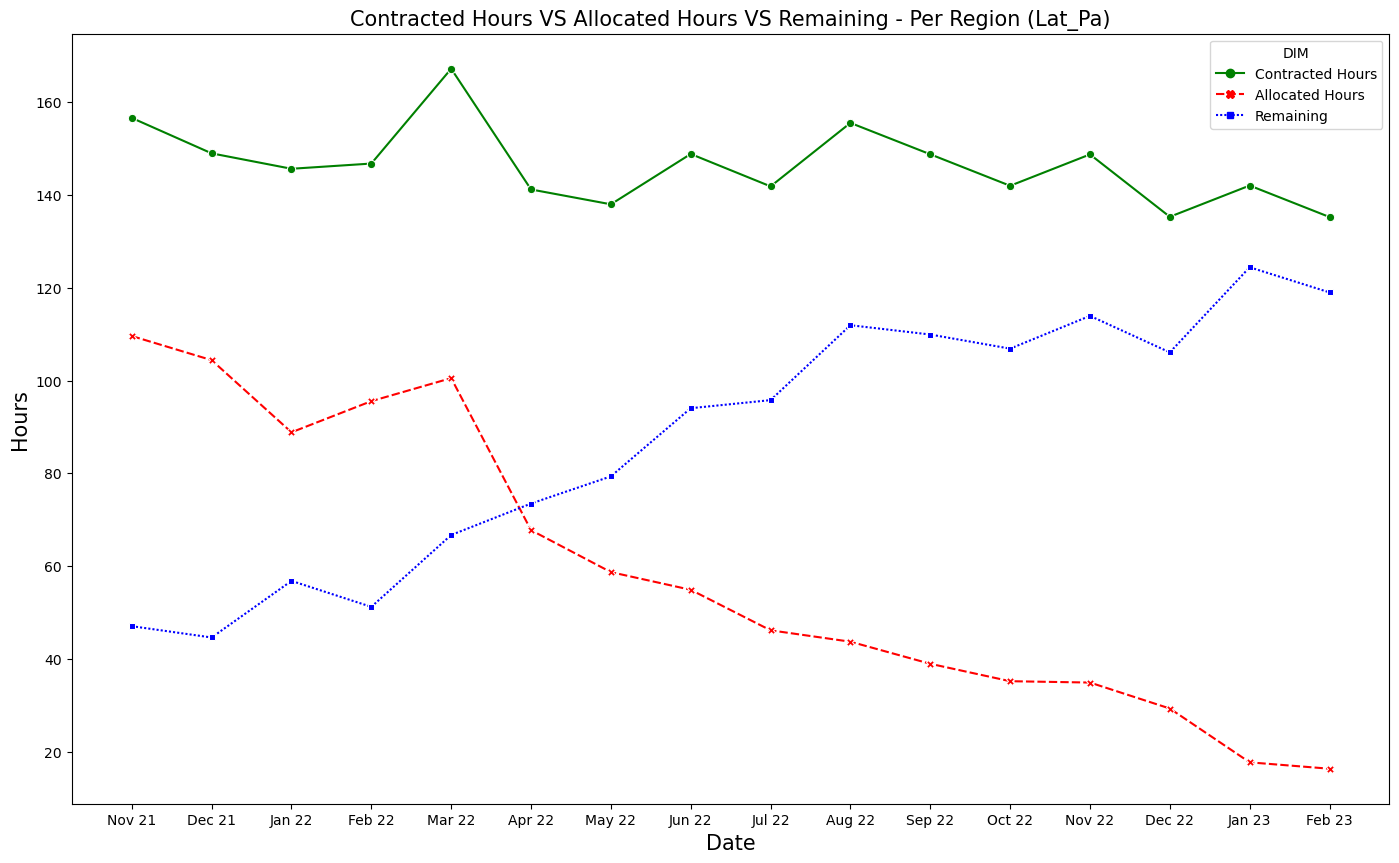

In [100]:
#Plotting the difference
plt.figure(figsize=(17,10))
Lat_Pa_Merged_Plot = sns.lineplot(Lat_Pa_Merged.T, palette=['green', 'red', 'blue'], markers=True)
Lat_Pa_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (Lat_Pa)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [101]:
#Count of employees in the region
print('The total Number of Employees is', Lat_Pa.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(Lat_Pa_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(Lat_Pa_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 287
The average Contracted hours over all months is  146
The average Allocated hours over all months is  59


#### **Findings** 
- Based on the above analysis of the Lat_Pa region, it is evident that there is a significant gap between the contracted and allocated hours. The contracted hours are very high, averaging 146 hours per employee over all months, while the allocated hours are very low, averaging only 59 hours per employee over all months. This gap indicates that the region may be overstaffed, and the business may be paying for more labor hours than it needs.
- The high trend in contracted hours and the downward trend in allocated hours (in graph) compliment the above narrative.

**In conclusion**, reducing staff in the Lat_Pa region could be a potential solution to address the significant gap between the contracted and allocated hours. However, any decision to reduce staff should be made with care and sensitivity, and should be based on a comprehensive review of staffing needs in comparison with
1- Customer Demand
2- Workload Patterns



---


## **Data Analysis:** Region `Central_USA`

In [102]:
Central_USA.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0244,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0244,Allocated Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
EMP_0244,Remaining,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0768,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0768,Allocated Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [103]:
#Aggregating the contracted hours per region per month
Central_USA_Contracted = Central_USA[Central_USA['DIM'] == 'Contracted Hours']
Central_USA_Contracted.reset_index(inplace=True)
Central_USA_Contracted.drop(columns='EMP', inplace=True)
Central_USA_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3326779160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Central_USA_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN


In [104]:
#Aggregating by the mean
Central_USA_Contracted = Central_USA_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\176454206.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Central_USA_Contracted = Central_USA_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [105]:
#Validating the changes
Central_USA_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,154.27897,146.777897,146.38412,149.120172,170.432403,146.272532,146.077253,160.269742,153.22176,168.02588,160.720386,153.382704,160.688197,146.109442,153.414893,146.109442


In [106]:
#Aggregating the allocated hours per region per month
Central_USA_Allocated = Central_USA[Central_USA['DIM'] == 'Allocated Hours']
Central_USA_Allocated.reset_index(inplace=True)
Central_USA_Allocated.drop(columns='EMP', inplace=True)
Central_USA_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2361245452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Central_USA_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,Allocated Hours,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,Allocated Hours,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,Allocated Hours,157.05,156.89,159.68,114.68,125.1,172.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,Allocated Hours,178.20,170.10,162.00,222.00,186.3,162.0,162.0,178.2,170.1,186.3,178.2,170.1,178.2,162.0,0.0,0.0,NaN,NaN


In [107]:
#Aggregating by the mean
Central_USA_Allocated = Central_USA_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\58079875.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Central_USA_Allocated = Central_USA_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [108]:
#Validating the changes
Central_USA_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,67.388213,63.846426,58.691702,64.926085,68.723957,47.983319,42.118894,38.925574,30.999787,24.107319,19.717872,18.236468,18.958468,15.772809,10.439787,9.214936


In [109]:
#Aggregating the allocated hours per region per month
Central_USA_Remaining = Central_USA[Central_USA['DIM'] == 'Remaining']
Central_USA_Remaining.reset_index(inplace=True)
Central_USA_Remaining.drop(columns='EMP', inplace=True)
Central_USA_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2642784034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Central_USA_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,165.00,157.50,150.00,150.00,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Remaining,165.00,157.50,150.00,150.00,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Remaining,165.00,157.50,150.00,150.00,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Remaining,7.95,0.61,-9.68,35.32,47.4,-22.5,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Remaining,-13.20,-12.60,-12.00,-72.00,-13.8,-12.0,-12.0,-13.2,-12.6,-13.8,-13.2,-12.6,-13.2,-12.0,157.5,150.0,NaN,NaN


In [110]:
#Aggregating by the mean
Central_USA_Remaining = Central_USA_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1489364969.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Central_USA_Remaining = Central_USA_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [111]:
#Validating the changes
Central_USA_Remaining

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,87.312627,83.338559,87.987076,84.480508,102.026144,98.539915,104.186695,121.569237,122.407924,144.077797,141.140466,135.276017,141.864873,130.452924,143.071568,136.983008


In [112]:
#Adding the 2 rows together into one dataframe
Central_USA_Merged = Central_USA_Contracted.append(Central_USA_Allocated)
Central_USA_Merged = Central_USA_Merged.append(Central_USA_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1861253152.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Central_USA_Merged = Central_USA_Contracted.append(Central_USA_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1861253152.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Central_USA_Merged = Central_USA_Merged.append(Central_USA_Remaining)


In [113]:
#Validating the changes
Central_USA_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,154.278970,67.388213,87.312627
Dec 21,146.777897,63.846426,83.338559
Jan 22,146.384120,58.691702,87.987076
Feb 22,149.120172,64.926085,84.480508
Mar 22,170.432403,68.723957,102.026144
Apr 22,146.272532,47.983319,98.539915
May 22,146.077253,42.118894,104.186695
Jun 22,160.269742,38.925574,121.569237
Jul 22,153.221760,30.999787,122.407924
Aug 22,168.025880,24.107319,144.077797


Text(0, 0.5, 'Hours')

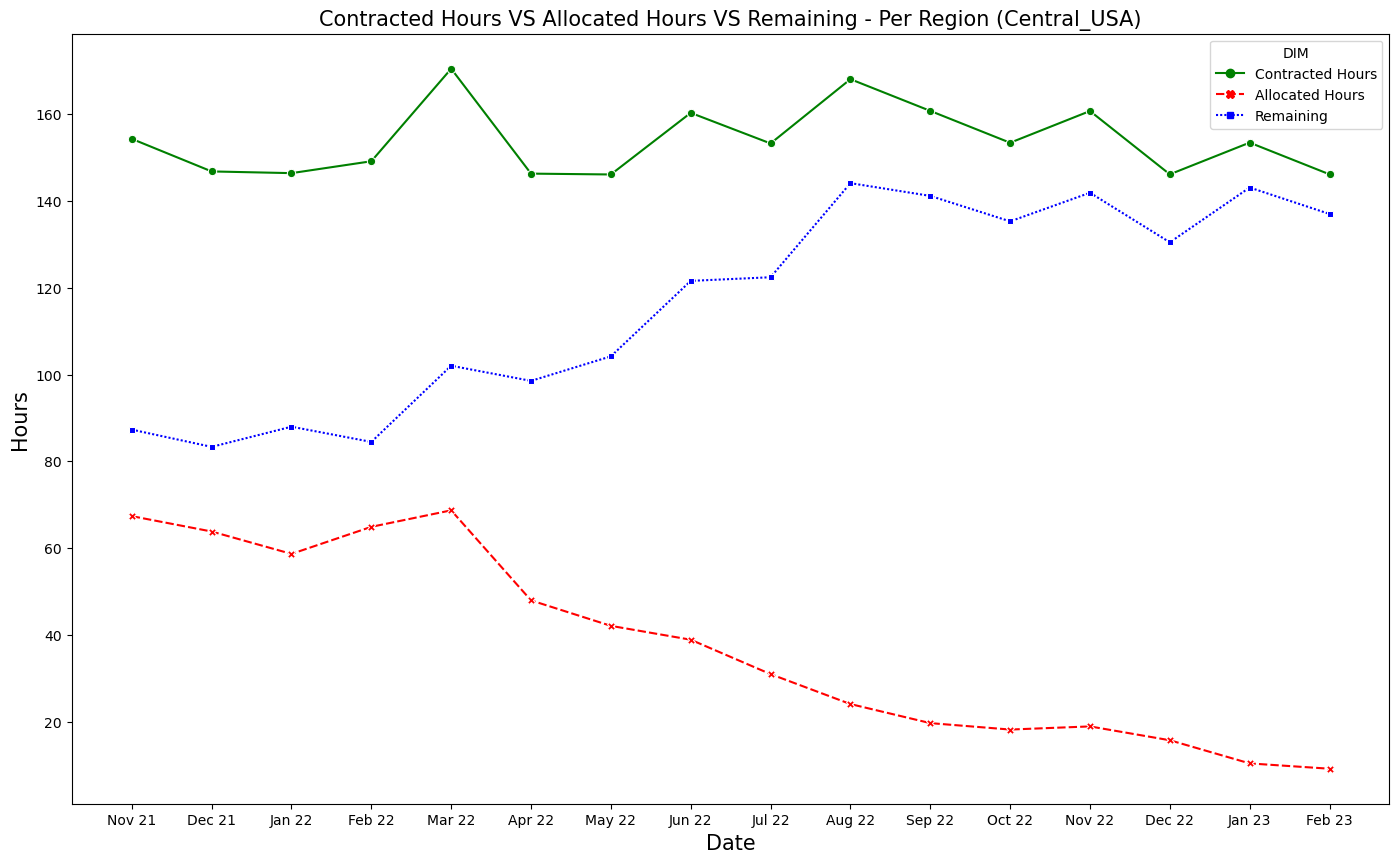

In [114]:
#Plotting the difference
plt.figure(figsize=(17,10))
Central_USA_Merged_Plot = sns.lineplot(Central_USA_Merged.T, palette=['green', 'red', 'blue'], markers=True)
Central_USA_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (Central_USA)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [115]:
#Count of employees in the region
print('The total Number of Employees is', Central_USA.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(Central_USA_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(Central_USA_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 231
The average Contracted hours over all months is  154
The average Allocated hours over all months is  38


#### **Findings** 
- Based on the analysis of the Lat_Pa and Central_USA regions, both regions are experiencing a significant gap between the contracted and allocated hours, with the contracted hours being much higher than the allocated hours. The data trends show that the gap between the two features is more pronounced in the Lat_Pa region, where the average allocated hours are only 59 per employee over all months, compared to 38 per employee in the Central USA region.

- This difference may be due to factors such as differences in customer demand, workload patterns, or staffing policies. However, both regions show a clear need for the business to conduct a comprehensive review of the staffing needs in each region.




---


## **Data Analysis:** Region `AF`

In [116]:
AF.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0431,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0431,Allocated Hours,178.2,170.1,162.0,222.0,186.3,162.0,162.0,178.2,170.1,186.3,178.2,170.1,178.2,162.0,0.0,0.0,NaN,NaN
EMP_0431,Remaining,-13.2,-12.6,-12.0,-72.0,-13.8,-12.0,-12.0,-13.2,-12.6,-13.8,-13.2,-12.6,-13.2,-12.0,157.5,150.0,NaN,NaN
EMP_0431,Technical,165.0,157.5,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0690,Completed
EMP_0431,Technical,0.0,0.0,0.0,0.0,142.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,0.0,0.0,TASK_T0010,Completed


In [117]:
#Aggregating the contracted hours per region per month
AF_Contracted = AF[AF['DIM'] == 'Contracted Hours']
AF_Contracted.reset_index(inplace=True)
AF_Contracted.drop(columns='EMP', inplace=True)
AF_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2547769234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AF_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,0.0,22.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,0.0,0.0,0.0,82.5,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN


In [118]:
#Aggregating by the mean
AF_Contracted = AF_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2269152317.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AF_Contracted = AF_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [119]:
#Validating the changes
AF_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,152.229381,145.153711,145.984536,147.685567,166.92732,145.28866,145.28866,159.817526,152.553196,167.081959,159.817526,152.553196,159.817526,145.28866,152.553196,145.28866


In [120]:
#Aggregating the allocated hours per region per month
AF_Allocated = AF[AF['DIM'] == 'Allocated Hours']
AF_Allocated.reset_index(inplace=True)
AF_Allocated.drop(columns='EMP', inplace=True)
AF_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3816262269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AF_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,178.2,170.10,162.00,222.00,186.30,162.0,162.00,178.20,170.10,186.30,178.20,170.10,178.20,162.0,0.0,0.0,NaN,NaN
1,Allocated Hours,0.0,0.00,167.17,189.00,234.60,186.0,175.50,16.50,15.75,16.50,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
2,Allocated Hours,181.5,168.00,149.25,189.00,224.25,195.0,183.75,57.75,55.13,60.38,57.75,55.13,57.75,52.5,31.5,30.0,NaN,NaN
3,Allocated Hours,0.0,0.00,0.00,82.50,172.50,150.0,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
4,Allocated Hours,148.5,141.75,114.88,149.63,155.25,135.0,135.00,115.50,110.25,120.75,115.50,110.25,115.50,105.0,0.0,0.0,NaN,NaN


In [121]:
#Aggregating by the mean
AF_Allocated = AF_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\418454834.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AF_Allocated = AF_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [122]:
#Validating the changes
AF_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,133.573163,131.125612,111.374082,123.59449,135.924184,106.319286,95.937857,87.005714,72.023163,69.543265,62.011224,53.265102,53.747245,44.948469,26.003469,23.510204


In [123]:
#Aggregating the allocated hours per region per month
AF_Remaining = AF[AF['DIM'] == 'Remaining']
AF_Remaining.reset_index(inplace=True)
AF_Remaining.drop(columns='EMP', inplace=True)
AF_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2687835783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AF_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,-13.2,-12.60,-12.00,-72.00,-13.80,-12.0,-12.00,-13.20,-12.60,-13.80,-13.20,-12.60,-13.20,-12.0,157.5,150.0,NaN,NaN
1,Remaining,0.0,22.50,-17.17,-39.00,-62.10,-36.0,-25.50,148.50,141.75,156.00,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
2,Remaining,-16.5,-10.50,0.75,-39.00,-51.75,-45.0,-33.75,107.25,102.38,112.13,107.25,102.38,107.25,97.5,126.0,120.0,NaN,NaN
3,Remaining,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
4,Remaining,16.5,15.75,35.12,0.38,17.25,15.0,15.00,49.50,47.25,51.75,49.50,47.25,49.50,45.0,157.5,150.0,NaN,NaN


In [124]:
#Aggregating by the mean
AF_Remaining = AF_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2361618613.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AF_Remaining = AF_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [125]:
#Validating the changes
AF_Remaining

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,18.786531,14.154388,34.651633,24.114898,31.060816,39.017449,49.398878,72.864796,80.581224,97.594898,97.859184,99.339388,106.123163,100.388265,126.60102,121.826531


In [126]:
#Adding the 2 rows together into one dataframe
AF_Merged = AF_Contracted.append(AF_Allocated)
AF_Merged = AF_Merged.append(AF_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1120381228.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AF_Merged = AF_Contracted.append(AF_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1120381228.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AF_Merged = AF_Merged.append(AF_Remaining)


In [127]:
#Validating the changes
AF_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,152.229381,133.573163,18.786531
Dec 21,145.153711,131.125612,14.154388
Jan 22,145.984536,111.374082,34.651633
Feb 22,147.685567,123.594490,24.114898
Mar 22,166.927320,135.924184,31.060816
Apr 22,145.288660,106.319286,39.017449
May 22,145.288660,95.937857,49.398878
Jun 22,159.817526,87.005714,72.864796
Jul 22,152.553196,72.023163,80.581224
Aug 22,167.081959,69.543265,97.594898


Text(0, 0.5, 'Hours')

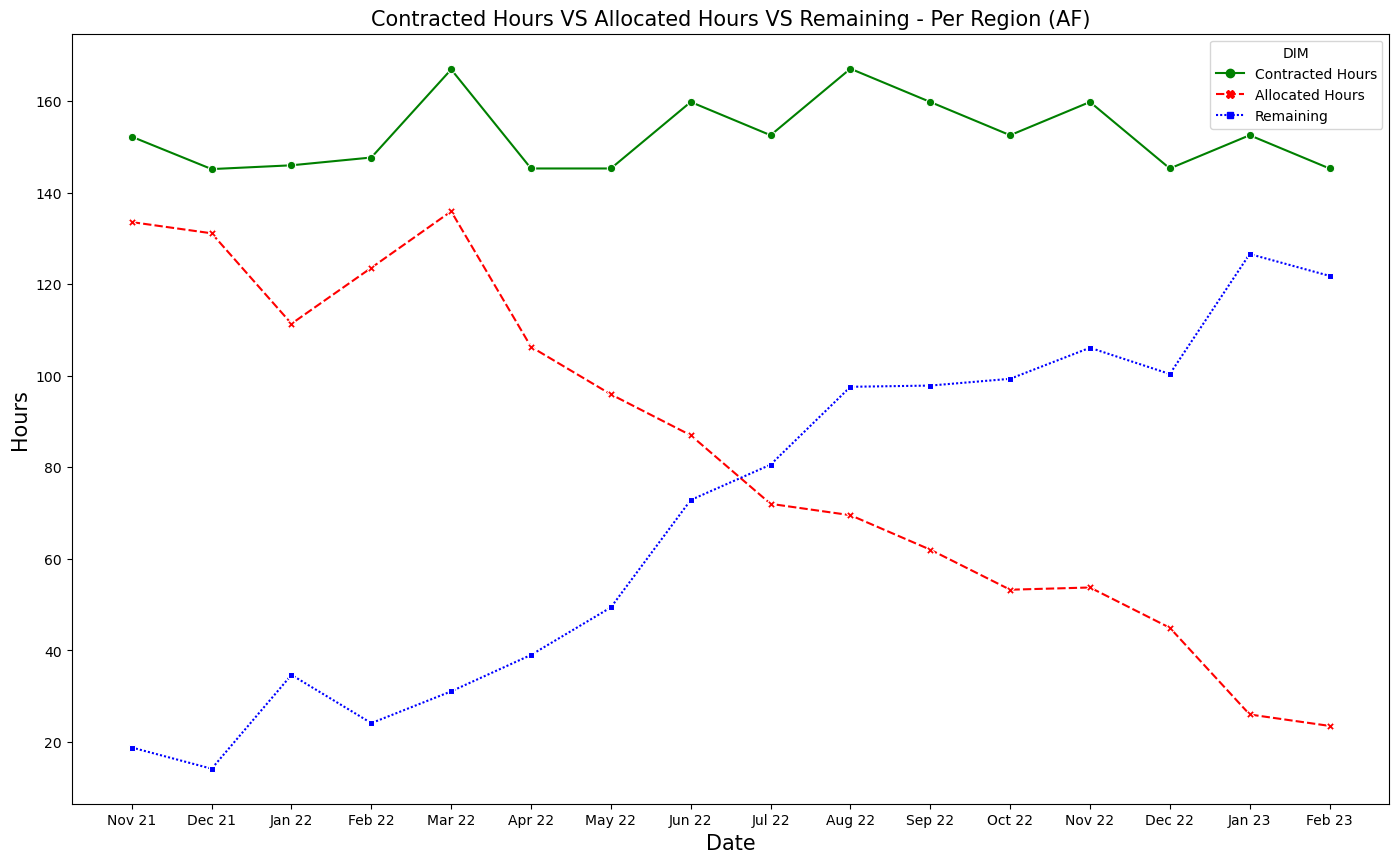

In [128]:
#Plotting the difference
plt.figure(figsize=(17,10))
AF_Merged_Plot = sns.lineplot(AF_Merged.T, palette=['green', 'red', 'blue'], markers=True)
AF_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (AF)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [129]:
#Count of employees in the region
print('The total Number of Employees is', AF.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(AF_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(AF_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 97
The average Contracted hours over all months is  153
The average Allocated hours over all months is  83


#### **Findings** 
- Based on the analysis of the Lat_Pa, Central_USA, and AF regions, all regions are experiencing a significant gap between the contracted and allocated hours, with the contracted hours being much higher than the allocated hours. This gap suggests that the regions may be overstaffed, and the business may be paying for more labor hours than it needs.

- However, the analysis of the AF region shows that the gap between the contracted and allocated hours was relatively small in the first four months, but then it increased significantly. This may be due to factors such as changes in customer demand, workload patterns, or staffing policies. For example, the region may have experienced a temporary increase in customer demand or a change in the nature of the work, leading to higher allocated hours.

- Moreover, it appears that the region has a lower gap between the contracted and allocated hours compared to the other regions analyzed. The average allocated hours of 83 per employee over all months is higher than the allocated hours for the Lat_Pa region, but lower than the allocated hours for the Central_USA region.

- The initial small gap between the contracted and allocated hours in the first five months of the AF region may be due to factors such as a better understanding of customer demand, more accurate workload forecasting, or efficient staffing policies. However, the significant increase in the gap between the contracted and allocated hours in the subsequent months may be an indication of changes in customer demand or workload patterns.




---


## **Data Analysis:** Region `MEA`

In [130]:
MEA.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0002,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
EMP_0002,Allocated Hours,46.2,44.1,0.0,0.0,0.0,0.0,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44,NaN,NaN
EMP_0002,Remaining,118.8,113.4,150.0,150.0,172.5,150.0,115.03,36.76,35.09,38.43,36.76,35.09,36.76,33.42,35.09,62.56,NaN,NaN
EMP_0002,Technical,0.0,0.0,0.0,0.0,0.0,0.0,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44,TASK_T0562,Completed
EMP_0002,Technical,46.2,44.1,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,TASK_T0428,Completed


In [131]:
#Aggregating the contracted hours per region per month
MEA_Contracted = MEA[MEA['DIM'] == 'Contracted Hours']
MEA_Contracted.reset_index(inplace=True)
MEA_Contracted.drop(columns='EMP', inplace=True)
MEA_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1310111776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEA_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,0.0,22.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [132]:
#Aggregating by the mean
MEA_Contracted = MEA_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3812988557.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MEA_Contracted = MEA_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [133]:
#Validating the changes
MEA_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,155.888672,146.936172,146.525391,146.818359,165.640469,139.731445,137.279297,147.926367,141.173164,154.562461,147.838477,140.733711,146.344336,132.837891,140.001289,133.306641


In [134]:
#Aggregating the allocated hours per region per month
MEA_Allocated = MEA[MEA['DIM'] == 'Allocated Hours']
MEA_Allocated.reset_index(inplace=True)
MEA_Allocated.drop(columns='EMP', inplace=True)
MEA_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\496983097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEA_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,46.20,44.10,0.00,0.00,0.0,0.0,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44,NaN,NaN
1,Allocated Hours,165.00,157.50,150.00,150.00,172.5,150.0,150.00,165.00,150.00,172.50,165.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
2,Allocated Hours,0.00,0.00,167.17,189.00,234.6,186.0,175.50,16.50,15.75,16.50,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,Allocated Hours,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
4,Allocated Hours,209.31,199.79,190.28,152.01,75.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN


In [135]:
#Aggregating by the mean
MEA_Allocated = MEA_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\4139402051.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MEA_Allocated = MEA_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [136]:
#Validating the changes
MEA_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,108.882412,99.792451,93.971712,99.319494,102.564008,71.140973,60.641323,51.014319,42.358755,39.963735,35.622412,32.670973,32.858482,27.963191,21.251012,19.035837


In [137]:
#Aggregating the allocated hours per region per month
MEA_Remaining = MEA[MEA['DIM'] == 'Remaining']
MEA_Remaining.reset_index(inplace=True)
MEA_Remaining.drop(columns='EMP', inplace=True)
MEA_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2450709158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEA_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,118.80,113.40,150.00,150.00,172.5,150.0,115.03,36.76,35.09,38.43,36.76,35.09,36.76,33.42,35.09,62.56,NaN,NaN
1,Remaining,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,7.50,0.00,0.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
2,Remaining,0.00,22.50,-17.17,-39.00,-62.1,-36.0,-25.50,148.50,141.75,156.00,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
3,Remaining,165.00,157.50,150.00,150.00,172.5,150.0,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
4,Remaining,-44.31,-42.29,-40.28,-2.01,97.5,150.0,150.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN


In [138]:
#Aggregating by the mean
MEA_Remaining = MEA_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1794096177.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MEA_Remaining = MEA_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [139]:
#Validating the changes
MEA_Remaining

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,47.04179,47.185136,52.567393,47.511401,63.103463,68.630428,76.68751,96.978521,98.87821,114.668833,112.28284,108.12821,113.558444,104.941479,118.818521,114.335759


In [140]:
#Adding the 2 rows together into one dataframe
MEA_Merged = MEA_Contracted.append(MEA_Allocated)
MEA_Merged = MEA_Merged.append(MEA_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\4095830429.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MEA_Merged = MEA_Contracted.append(MEA_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\4095830429.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MEA_Merged = MEA_Merged.append(MEA_Remaining)


In [141]:
#Validating the changes
MEA_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,155.888672,108.882412,47.041790
Dec 21,146.936172,99.792451,47.185136
Jan 22,146.525391,93.971712,52.567393
Feb 22,146.818359,99.319494,47.511401
Mar 22,165.640469,102.564008,63.103463
Apr 22,139.731445,71.140973,68.630428
May 22,137.279297,60.641323,76.687510
Jun 22,147.926367,51.014319,96.978521
Jul 22,141.173164,42.358755,98.878210
Aug 22,154.562461,39.963735,114.668833


Text(0, 0.5, 'Hours')

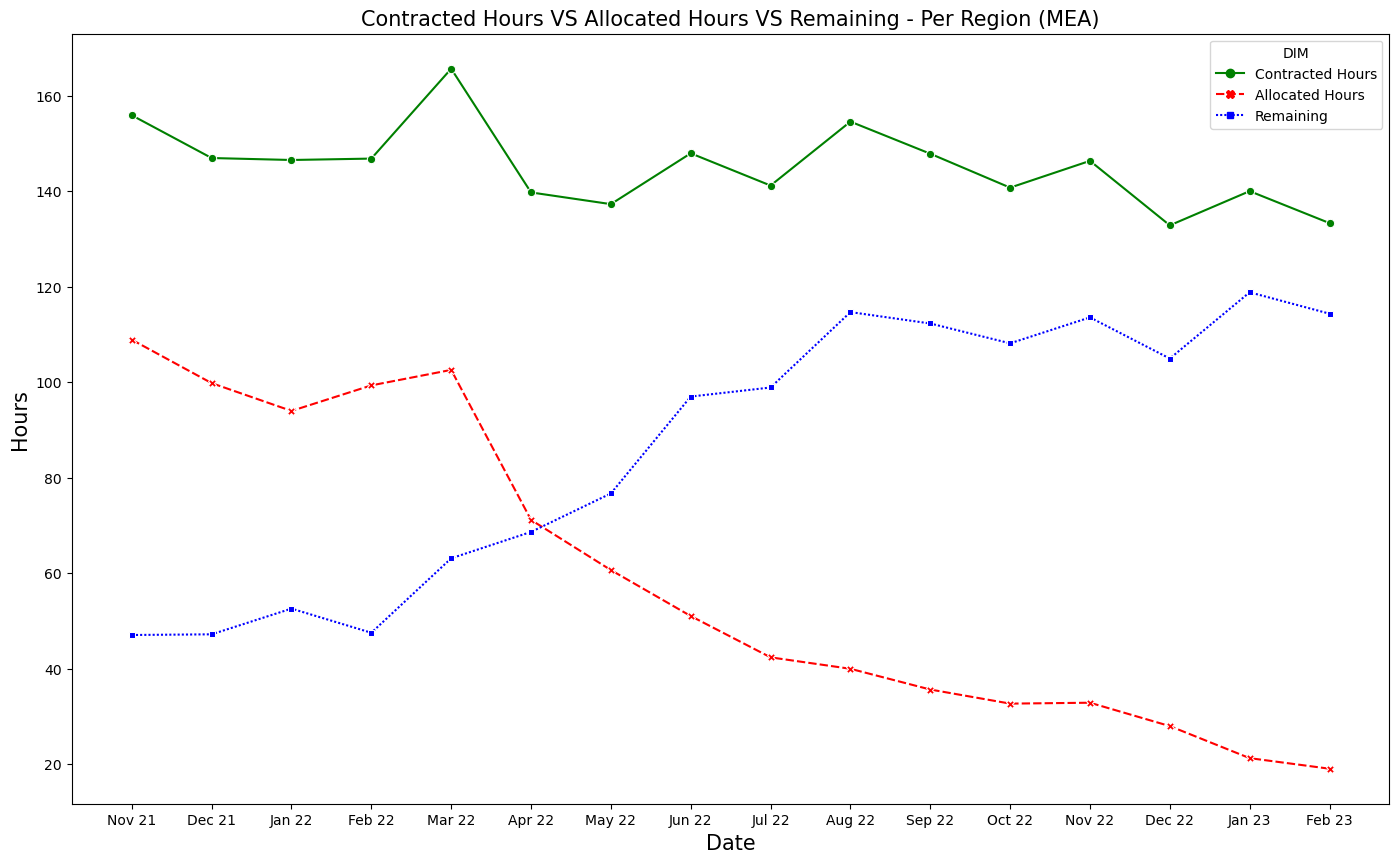

In [142]:
#Plotting the difference
plt.figure(figsize=(17,10))
MEA_Merged_Plot = sns.lineplot(MEA_Merged.T, palette=['green', 'red', 'blue'], markers=True)
MEA_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (MEA)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [143]:
#Count of employees in the region
print('The total Number of Employees is', MEA.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(MEA_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(MEA_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 256
The average Contracted hours over all months is  145
The average Allocated hours over all months is  59


#### **Findings** 
- The analysis of the MEA and AF regions reveals similar findings in terms of the gap between contracted and allocated hours. Both regions experience a significant gap between the contracted and allocated hours, with the contracted hours being much higher than the allocated hours. Additionally, both regions exhibit a small gap between the contracted and allocated hours in the initial months, which suddenly increases in the subsequent months.






---


## **Data Analysis:** Region `MER`

In [144]:
MER.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0431,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0431,Allocated Hours,178.2,170.1,162.0,222.0,186.3,162.0,162.0,178.2,170.1,186.3,178.2,170.1,178.2,162.0,0.0,0.0,NaN,NaN
EMP_0431,Remaining,-13.2,-12.6,-12.0,-72.0,-13.8,-12.0,-12.0,-13.2,-12.6,-13.8,-13.2,-12.6,-13.2,-12.0,157.5,150.0,NaN,NaN
EMP_0431,Technical,13.2,12.6,12.0,12.0,13.8,12.0,12.0,13.2,12.6,13.8,13.2,12.6,13.2,12.0,0.0,0.0,TASK_T0958,Completed
EMP_0431,Technical,165.0,157.5,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0690,Completed


In [145]:
#Aggregating the contracted hours per region per month
MER_Contracted = MER[MER['DIM'] == 'Contracted Hours']
MER_Contracted.reset_index(inplace=True)
MER_Contracted.drop(columns='EMP', inplace=True)
MER_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1743871219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MER_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN


In [146]:
#Aggregating by the mean
MER_Contracted = MER_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\628152185.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MER_Contracted = MER_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [147]:
#Validating the changes
MER_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,160.300505,153.731111,147.60101,147.676768,169.226061,147.90404,147.146465,159.088384,151.678081,165.210909,158.027778,149.556869,156.285354,142.29798,149.329596,142.146465


In [148]:
#Aggregating the allocated hours per region per month
MER_Allocated = MER[MER['DIM'] == 'Allocated Hours']
MER_Allocated.reset_index(inplace=True)
MER_Allocated.drop(columns='EMP', inplace=True)
MER_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2309408900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MER_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,178.2,170.1,162.00,222.0,186.30,162.0,162.00,178.20,170.10,186.30,178.20,170.10,178.20,162.0,0.0,0.0,NaN,NaN
1,Allocated Hours,181.5,168.0,149.25,189.0,224.25,195.0,183.75,57.75,55.13,60.38,57.75,55.13,57.75,52.5,31.5,30.0,NaN,NaN
2,Allocated Hours,165.0,157.5,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
3,Allocated Hours,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
4,Allocated Hours,165.0,157.5,150.00,150.0,172.50,150.0,150.00,165.00,157.50,172.50,165.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN


In [149]:
#Aggregating by the mean
MER_Allocated = MER_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\923092387.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MER_Allocated = MER_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [150]:
#Validating the changes
MER_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,140.023,128.1392,98.5141,120.6846,136.3026,102.3668,91.6114,80.8575,73.0275,72.2272,68.0389,61.951,63.9853,55.5189,43.5335,41.3736


In [151]:
#Aggregating the allocated hours per region per month
MER_Remaining = MER[MER['DIM'] == 'Remaining']
MER_Remaining.reset_index(inplace=True)
MER_Remaining.drop(columns='EMP', inplace=True)
MER_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\772067027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MER_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,-13.2,-12.6,-12.00,-72.0,-13.80,-12.0,-12.00,-13.20,-12.60,-13.80,-13.20,-12.60,-13.20,-12.0,157.5,150.0,NaN,NaN
1,Remaining,-16.5,-10.5,0.75,-39.0,-51.75,-45.0,-33.75,107.25,102.38,112.13,107.25,102.38,107.25,97.5,126.0,120.0,NaN,NaN
2,Remaining,0.0,0.0,150.00,150.0,172.50,150.0,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
3,Remaining,165.0,157.5,150.00,150.0,172.50,150.0,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
4,Remaining,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN


In [152]:
#Aggregating by the mean
MER_Remaining = MER_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\740726520.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MER_Remaining = MER_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [153]:
#Validating the changes
MER_Remaining

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,20.3245,25.6299,49.1111,27.0156,32.9565,45.5582,55.5637,78.29,78.7101,93.0577,90.0586,87.6863,92.3872,86.8561,105.8787,100.8514


In [154]:
#Adding the 2 rows together into one dataframe
MER_Merged = MER_Contracted.append(MER_Allocated)
MER_Merged = MER_Merged.append(MER_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\482624093.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MER_Merged = MER_Contracted.append(MER_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\482624093.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MER_Merged = MER_Merged.append(MER_Remaining)


In [155]:
#Validating the changes
MER_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,160.300505,140.0230,20.3245
Dec 21,153.731111,128.1392,25.6299
Jan 22,147.601010,98.5141,49.1111
Feb 22,147.676768,120.6846,27.0156
Mar 22,169.226061,136.3026,32.9565
Apr 22,147.904040,102.3668,45.5582
May 22,147.146465,91.6114,55.5637
Jun 22,159.088384,80.8575,78.2900
Jul 22,151.678081,73.0275,78.7101
Aug 22,165.210909,72.2272,93.0577


Text(0, 0.5, 'Hours')

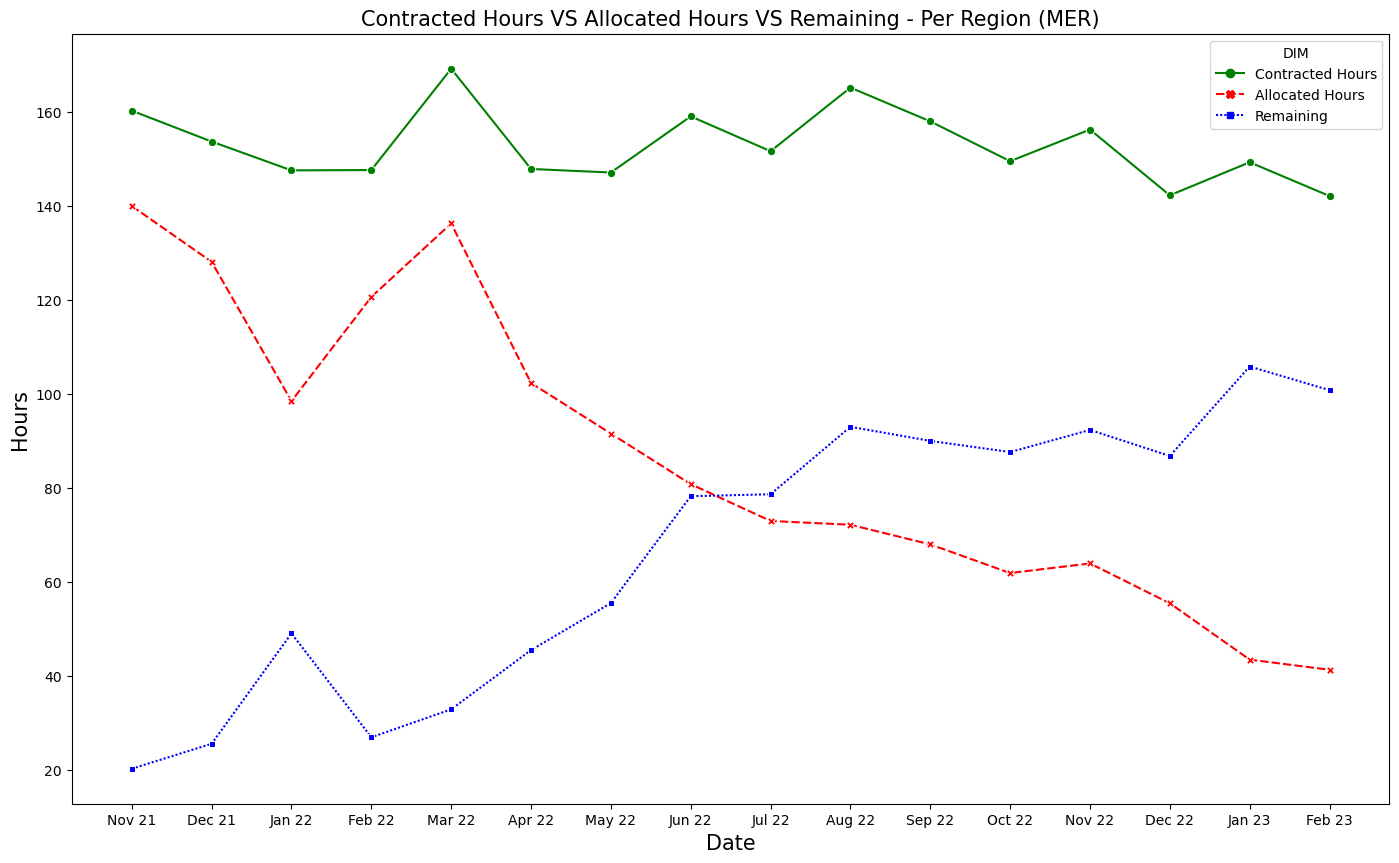

In [156]:
#Plotting the difference
plt.figure(figsize=(17,10))
MER_Merged_Plot = sns.lineplot(MER_Merged.T, palette=['green', 'red', 'blue'], markers=True)
MER_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (MER)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [157]:
#Count of employees in the region
print('The total Number of Employees is', MER.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(MER_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(MER_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 97
The average Contracted hours over all months is  153
The average Allocated hours over all months is  86


#### **Findings** 
- It appears that the region experiences a small gap between the contracted and allocated hours in the first five months, similar to the MEA and AF regions. However, the significant drop in allocated hours in month 3 and the very significant drop after month 5 suggest that the region may have experienced similar reasons to the significant drop after month #5.






---


## **Data Analysis:** Region `CSE`

In [158]:
CSE.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Allocated Hours,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
EMP_0245,Remaining,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Technical,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0471,Completed
EMP_0245,Technical,165.0,157.5,150.00,105.0,69.00,60.00,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0046,Completed


In [159]:
#Aggregating the contracted hours per region per month
CSE_Contracted = CSE[CSE['DIM'] == 'Contracted Hours']
CSE_Contracted.reset_index(inplace=True)
CSE_Contracted.drop(columns='EMP', inplace=True)
CSE_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2557543169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSE_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,0.0,22.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN


In [160]:
#Aggregating by the mean
CSE_Contracted = CSE_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2706599941.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CSE_Contracted = CSE_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [161]:
#Validating the changes
CSE_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,156.476866,144.826493,145.483209,146.879664,167.073433,143.04291,141.548507,154.702612,147.991306,161.274104,153.751119,146.815933,153.527239,139.516791,146.256231,139.264925


In [162]:
#Aggregating the allocated hours per region per month
CSE_Allocated = CSE[CSE['DIM'] == 'Allocated Hours']
CSE_Allocated.reset_index(inplace=True)
CSE_Allocated.drop(columns='EMP', inplace=True)
CSE_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\804344530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSE_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,165.00,157.50,155.63,148.50,85.5,60.38,60.00,66.00,63.00,69.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,Allocated Hours,46.20,44.10,0.00,0.00,0.0,0.00,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44,NaN,NaN
2,Allocated Hours,165.00,157.50,150.00,150.00,172.5,150.00,150.00,165.00,150.00,172.50,165.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,Allocated Hours,157.05,156.89,159.68,114.68,125.1,172.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
4,Allocated Hours,0.00,0.00,167.18,189.00,234.6,186.00,175.50,16.50,15.75,16.50,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN


In [163]:
#Aggregating by the mean
CSE_Allocated = CSE_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3721446756.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CSE_Allocated = CSE_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [164]:
#Validating the changes
CSE_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,114.764126,108.591673,106.163234,113.707993,117.849033,81.094089,66.512416,57.455911,48.982491,41.174981,35.588104,32.014833,30.825948,26.105428,20.98342,18.158513


In [165]:
#Aggregating the allocated hours per region per month
CSE_Remaining = CSE[CSE['DIM'] == 'Remaining']
CSE_Remaining.reset_index(inplace=True)
CSE_Remaining.drop(columns='EMP', inplace=True)
CSE_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2691845477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSE_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,0.00,0.00,-5.63,1.50,87.0,89.63,90.00,99.00,94.50,103.50,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
1,Remaining,118.80,113.40,150.00,150.00,172.5,150.00,115.03,36.76,35.09,38.43,36.76,35.09,36.76,33.42,35.09,62.56,NaN,NaN
2,Remaining,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,7.50,0.00,0.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
3,Remaining,7.95,0.61,-9.68,35.32,47.4,-22.50,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
4,Remaining,0.00,22.50,-17.18,-39.00,-62.1,-36.00,-25.50,148.50,141.75,156.00,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN


In [166]:
#Aggregating by the mean
CSE_Remaining = CSE_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3090044119.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CSE_Remaining = CSE_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [167]:
#Validating the changes
CSE_Remaining

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,41.744461,36.282268,39.336914,33.18342,49.245019,61.974758,75.067546,97.285019,99.04461,120.141152,118.204833,114.841041,122.743941,113.450335,125.31487,121.14632


In [168]:
#Adding the 2 rows together into one dataframe
CSE_Merged = CSE_Contracted.append(CSE_Allocated)
CSE_Merged = CSE_Merged.append(CSE_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2589843914.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CSE_Merged = CSE_Contracted.append(CSE_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2589843914.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CSE_Merged = CSE_Merged.append(CSE_Remaining)


In [169]:
#Validating the changes
CSE_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,156.476866,114.764126,41.744461
Dec 21,144.826493,108.591673,36.282268
Jan 22,145.483209,106.163234,39.336914
Feb 22,146.879664,113.707993,33.183420
Mar 22,167.073433,117.849033,49.245019
Apr 22,143.042910,81.094089,61.974758
May 22,141.548507,66.512416,75.067546
Jun 22,154.702612,57.455911,97.285019
Jul 22,147.991306,48.982491,99.044610
Aug 22,161.274104,41.174981,120.141152


Text(0, 0.5, 'Hours')

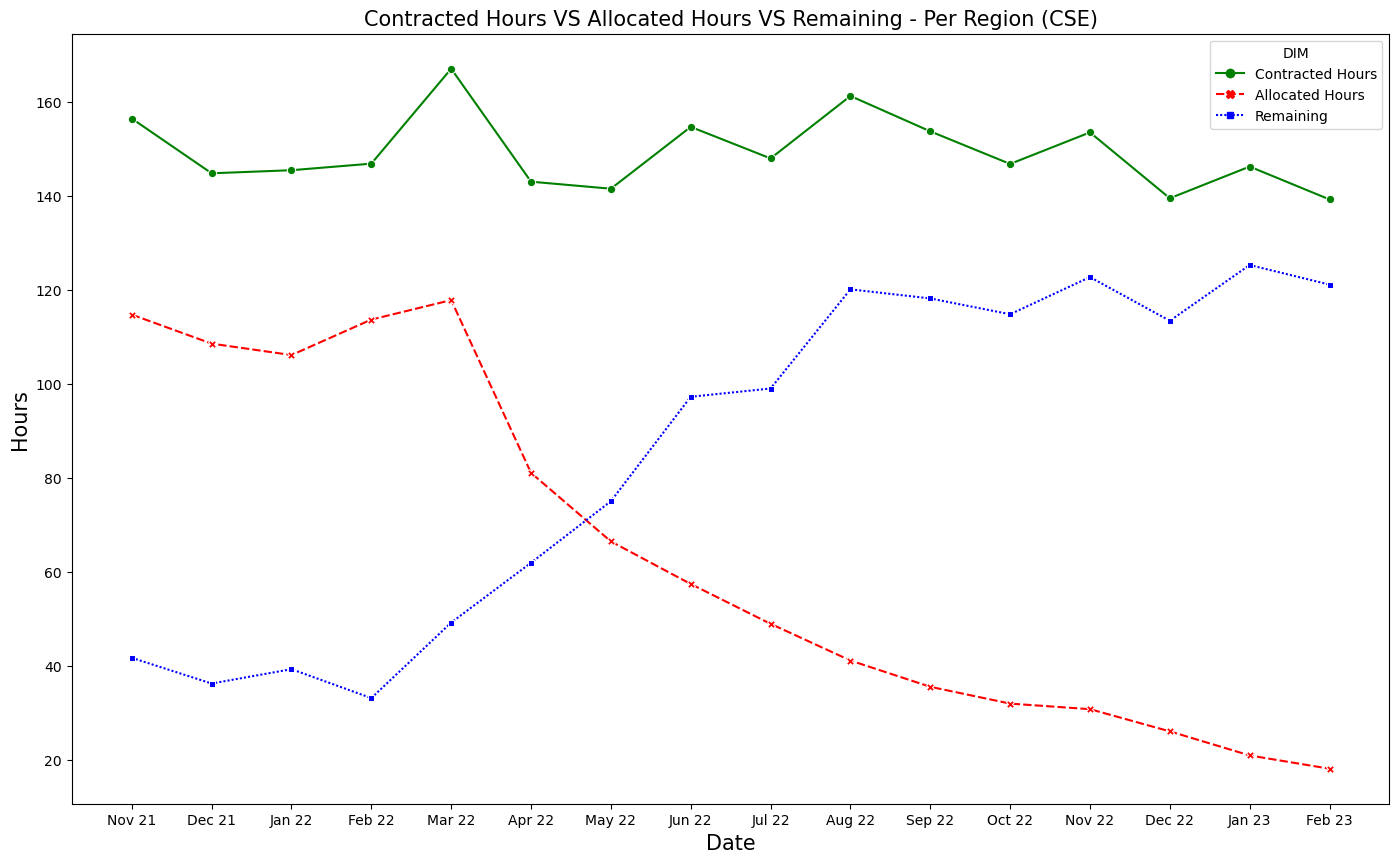

In [170]:
#Plotting the difference
plt.figure(figsize=(17,10))
CSE_Merged_Plot = sns.lineplot(CSE_Merged.T, palette=['green', 'red', 'blue'], markers=True)
CSE_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (CSE)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [171]:
#Count of employees in the region
print('The total Number of Employees is', CSE.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(CSE_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(CSE_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 267
The average Contracted hours over all months is  149
The average Allocated hours over all months is  64


#### **Findings** 
- Based on the analysis of the CSE region, it appears that the region experiences the same similarities in terms of contracted hours and allocated hours trend with the other regions of AF, MEA, and MER. The region exhibits a significant gap between contracted and allocated hours, with the contracted hours being much higher than the allocated hours. The initial small gap between the contracted and allocated hours in the first five months may be due to factors such as more accurate workload forecasting or efficient staffing policies. However, the significant drop in allocated hours after month 5 suggests that the region may have experienced a sudden change in customer demand or workload patterns.







---


## **Data Analysis:** Region `Subsaharan`

In [172]:
Subsaharan.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Allocated Hours,165.0,157.5,155.63,148.5,85.50,60.38,60.0,66.0,63.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
EMP_0245,Remaining,0.0,0.0,-5.63,1.5,87.00,89.63,90.0,99.0,94.5,103.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Technical,0.0,0.0,0.00,22.5,9.38,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0288,Completed
EMP_0245,Technical,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0471,Completed


In [173]:
#Aggregating the contracted hours per region per month
Subsaharan_Contracted = Subsaharan[Subsaharan['DIM'] == 'Contracted Hours']
Subsaharan_Contracted.reset_index(inplace=True)
Subsaharan_Contracted.drop(columns='EMP', inplace=True)
Subsaharan_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2489327315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subsaharan_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN


In [174]:
#Aggregating by the mean
Subsaharan_Contracted = Subsaharan_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2198838289.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Subsaharan_Contracted = Subsaharan_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [175]:
#Validating the changes
Subsaharan_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,159.195479,151.496011,146.489362,148.922872,169.537872,144.393617,143.683511,157.537234,150.071809,164.364362,157.218085,150.071809,157.218085,142.925532,150.071809,142.925532


In [176]:
#Aggregating the allocated hours per region per month
Subsaharan_Allocated = Subsaharan[Subsaharan['DIM'] == 'Allocated Hours']
Subsaharan_Allocated.reset_index(inplace=True)
Subsaharan_Allocated.drop(columns='EMP', inplace=True)
Subsaharan_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2181210675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subsaharan_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,165.00,157.50,155.63,148.50,85.50,60.38,60.00,66.00,63.00,69.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
1,Allocated Hours,157.05,156.89,159.68,114.68,125.10,172.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,NaN
2,Allocated Hours,181.50,168.00,149.25,189.00,224.25,195.00,183.75,57.75,55.13,60.38,57.75,55.13,57.75,52.5,31.5,30.0,NaN,NaN
3,Allocated Hours,148.50,141.75,114.88,149.63,155.25,135.00,135.00,115.50,110.25,120.75,115.50,110.25,115.50,105.0,0.0,0.0,NaN,NaN
4,Allocated Hours,165.00,157.50,148.48,142.50,163.88,142.50,142.50,24.75,23.63,25.88,24.75,23.63,24.75,22.5,0.0,0.0,NaN,NaN


In [177]:
#Aggregating by the mean
Subsaharan_Allocated = Subsaharan_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2356765641.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Subsaharan_Allocated = Subsaharan_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [178]:
#Validating the changes
Subsaharan_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,127.58254,119.14455,113.106296,118.666772,125.882328,87.413228,72.121376,67.085714,58.682063,54.70619,42.177302,39.048942,39.155661,33.012275,24.510582,21.961111


In [179]:
#Aggregating the allocated hours per region per month
Subsaharan_Remaining = Subsaharan[Subsaharan['DIM'] == 'Remaining']
Subsaharan_Remaining.reset_index(inplace=True)
Subsaharan_Remaining.drop(columns='EMP', inplace=True)
Subsaharan_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\224133694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subsaharan_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,0.00,0.00,-5.63,1.50,87.00,89.63,90.00,99.00,94.50,103.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
1,Remaining,7.95,0.61,-9.68,35.32,47.40,-22.50,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.0,157.5,150.0,NaN,NaN
2,Remaining,-16.50,-10.50,0.75,-39.00,-51.75,-45.00,-33.75,107.25,102.38,112.13,107.25,102.38,107.25,97.5,126.0,120.0,NaN,NaN
3,Remaining,16.50,15.75,35.12,0.38,17.25,15.00,15.00,49.50,47.25,51.75,49.50,47.25,49.50,45.0,157.5,150.0,NaN,NaN
4,Remaining,0.00,0.00,1.52,7.50,8.63,7.50,7.50,140.25,133.88,146.63,140.25,133.88,140.25,127.5,157.5,150.0,NaN,NaN


In [180]:
#Aggregating by the mean
Subsaharan_Remaining = Subsaharan_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3808772606.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Subsaharan_Remaining = Subsaharan_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [181]:
#Validating the changes
Subsaharan_Remaining

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,31.643651,32.383545,33.401746,30.262011,43.671799,57.010212,71.595503,90.491005,91.429471,109.70164,115.081958,111.06254,118.103598,109.950688,125.600688,121.001852


In [182]:
#Adding the 2 rows together into one dataframe
Subsaharan_Merged = Subsaharan_Contracted.append(Subsaharan_Allocated)
Subsaharan_Merged = Subsaharan_Merged.append(Subsaharan_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\443149437.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Subsaharan_Merged = Subsaharan_Contracted.append(Subsaharan_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\443149437.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Subsaharan_Merged = Subsaharan_Merged.append(Subsaharan_Remaining)


In [183]:
#Validating the changes
Subsaharan_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,159.195479,127.582540,31.643651
Dec 21,151.496011,119.144550,32.383545
Jan 22,146.489362,113.106296,33.401746
Feb 22,148.922872,118.666772,30.262011
Mar 22,169.537872,125.882328,43.671799
Apr 22,144.393617,87.413228,57.010212
May 22,143.683511,72.121376,71.595503
Jun 22,157.537234,67.085714,90.491005
Jul 22,150.071809,58.682063,91.429471
Aug 22,164.364362,54.706190,109.701640


Text(0, 0.5, 'Hours')

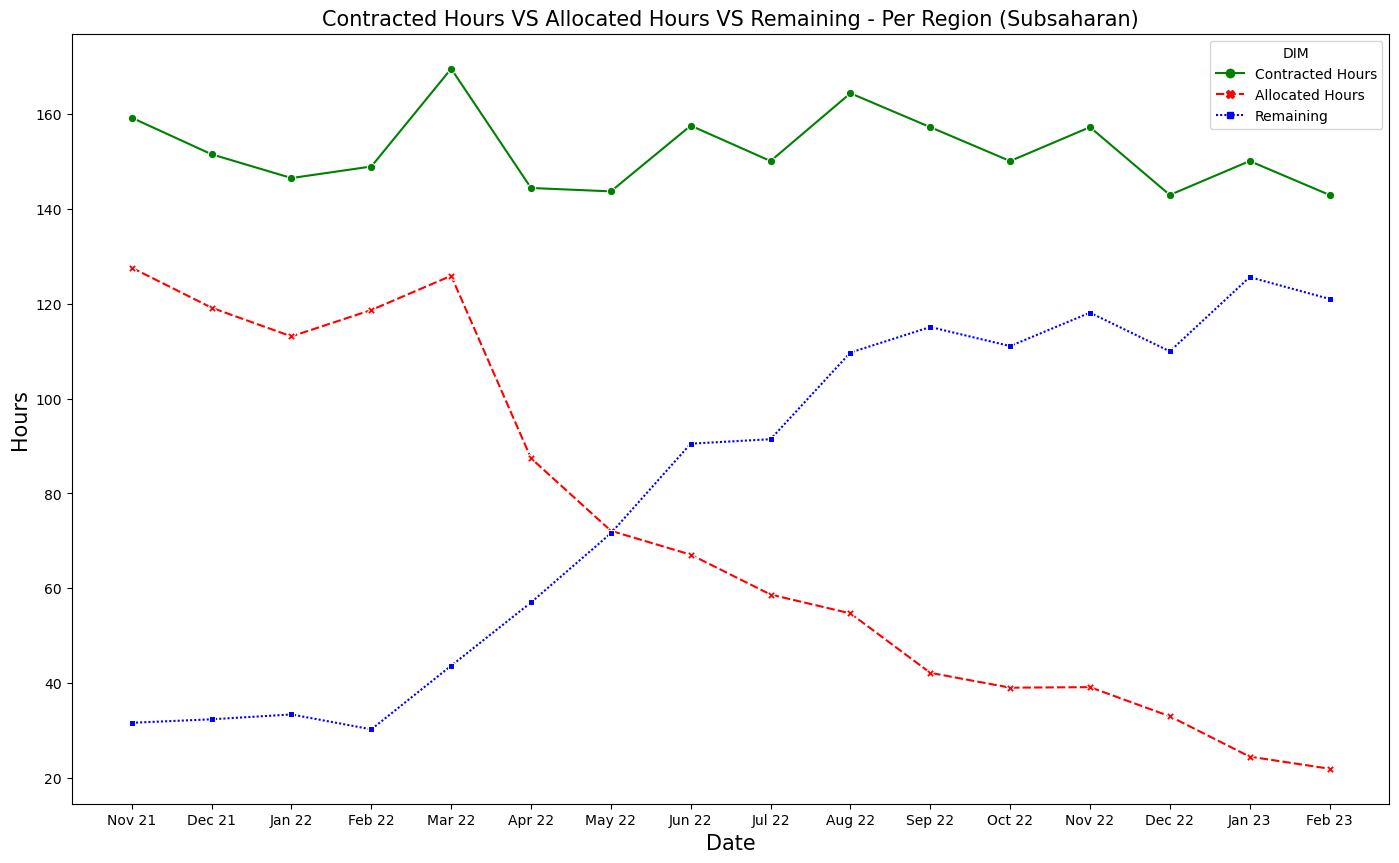

In [184]:
#Plotting the difference
plt.figure(figsize=(17,10))
Subsaharan_Merged_Plot = sns.lineplot(Subsaharan_Merged.T, palette=['green', 'red', 'blue'], markers=True)
Subsaharan_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (Subsaharan)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [185]:
#Count of employees in the region
print('The total Number of Employees is', Subsaharan.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(Subsaharan_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(Subsaharan_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 188
The average Contracted hours over all months is  152
The average Allocated hours over all months is  72


#### **Findings** 
- Based on the analysis of the Subsaharan region, it appears that the region experiences the same similarities in terms of a small gap between the average contracted and allocated hours in the first five months, followed by a significant drop after month 5, as observed in the AF, MEA, MER, and CSE regions. The region has an average allocated hours of 72 per employee over all months, compared to an average contracted hours of 152 per employee over all months.

- The sudden drop in allocated hours after month 5 in the Subsaharan region, similar to the AF, MEA, MER, and CSE regions, suggests that the region may have experienced a sudden change in customer demand or workload patterns.







---


## **Data Analysis:** Region `F_east`

In [186]:
F_east.head()

,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
EMP,,,,,,,,,,,,,,,,,,,
EMP_0245,Contracted Hours,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Allocated Hours,165.0,157.5,155.63,193.5,189.00,150.38,150.0,165.0,157.5,172.5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
EMP_0245,Remaining,0.0,0.0,-5.63,-43.5,-16.50,-0.38,0.0,0.0,0.0,0.0,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
EMP_0245,Technical,0.0,0.0,5.63,21.0,7.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0471,Completed
EMP_0245,Technical,165.0,157.5,150.00,150.0,172.50,150.00,150.0,165.0,157.5,172.5,0.0,0.0,0.0,0.0,0.0,0.0,TASK_T0046,Completed


In [187]:
#Aggregating the contracted hours per region per month
F_east_Contracted = F_east[F_east['DIM'] == 'Contracted Hours']
F_east_Contracted.reset_index(inplace=True)
F_east_Contracted.drop(columns='EMP', inplace=True)
F_east_Contracted.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2246922668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F_east_Contracted.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
1,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
2,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
3,Contracted Hours,165.0,157.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN
4,Contracted Hours,0.0,22.5,150.0,150.0,172.5,150.0,150.0,165.0,157.5,172.5,165.0,157.5,165.0,150.0,157.5,150.0,NaN,NaN


In [188]:
#Aggregating by the mean
F_east_Contracted = F_east_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\308969284.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  F_east_Contracted = F_east_Contracted.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [189]:
#Validating the changes
F_east_Contracted

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Contracted Hours,156.602206,144.709559,145.301471,146.194853,166.201949,141.987132,140.404412,153.695956,147.152279,160.487904,153.006618,146.104485,152.786029,138.788603,145.525441,138.595588


In [190]:
#Aggregating the allocated hours per region per month
F_east_Allocated = F_east[F_east['DIM'] == 'Allocated Hours']
F_east_Allocated.reset_index(inplace=True)
F_east_Allocated.drop(columns='EMP', inplace=True)
F_east_Allocated.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\3289466217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F_east_Allocated.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Allocated Hours,165.00,157.50,155.63,193.50,189.00,150.38,150.00,165.00,157.50,172.50,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,Allocated Hours,46.20,44.10,0.00,0.00,0.00,0.00,34.97,128.24,122.41,134.07,128.24,122.41,128.24,116.58,122.41,87.44,NaN,NaN
2,Allocated Hours,165.00,157.50,150.00,150.00,172.50,150.00,150.00,165.00,150.00,172.50,165.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,Allocated Hours,157.05,156.89,159.68,189.68,211.35,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
4,Allocated Hours,0.00,0.00,167.18,189.00,217.35,96.00,90.00,16.50,15.75,16.50,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN


In [191]:
#Aggregating by the mean
F_east_Allocated = F_east_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\1601705689.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  F_east_Allocated = F_east_Allocated.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [192]:
#Validating the changes
F_east_Allocated

,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Allocated Hours,115.803382,109.591691,103.893088,111.904853,113.819412,75.078713,61.321728,56.065551,47.542757,40.694449,35.567206,32.005478,30.306066,25.719559,20.49875,17.818051


In [193]:
#Aggregating the allocated hours per region per month
F_east_Remaining = F_east[F_east['DIM'] == 'Remaining']
F_east_Remaining.reset_index(inplace=True)
F_east_Remaining.drop(columns='EMP', inplace=True)
F_east_Remaining.head()

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\2944758716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F_east_Remaining.drop(columns='EMP', inplace=True)


,DIM,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23,Task,APPROVAL
0,Remaining,0.00,0.00,-5.63,-43.50,-16.50,-0.38,0.00,0.00,0.00,0.00,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
1,Remaining,118.80,113.40,150.00,150.00,172.50,150.00,115.03,36.76,35.09,38.43,36.76,35.09,36.76,33.42,35.09,62.56,NaN,NaN
2,Remaining,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.50,0.00,0.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
3,Remaining,7.95,0.61,-9.68,-39.68,-38.85,-30.00,150.00,165.00,157.50,172.50,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN
4,Remaining,0.00,22.50,-17.18,-39.00,-44.85,54.00,60.00,148.50,141.75,156.00,165.00,157.50,165.00,150.00,157.50,150.00,NaN,NaN


In [194]:
#Aggregating by the mean
F_east_Remaining = F_east_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\359736740.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  F_east_Remaining = F_east_Remaining.groupby(['DIM'])['Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22','May 22','Jun 22','Jul 22','Aug 22','Sep 22','Oct 22','Nov 22','Dec 22','Jan 23','Feb 23'].agg('mean')


In [195]:
#Validating the changes
F_east_Remaining


,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22,Jul 22,Aug 22,Sep 22,Oct 22,Nov 22,Dec 22,Jan 23,Feb 23
DIM,,,,,,,,,,,,,,,,
Remaining,40.79886,35.118125,41.408529,34.290074,52.382941,66.908456,79.082757,97.630441,99.609963,119.79386,117.439412,114.099338,122.479963,113.069044,125.026949,120.777537


In [196]:
#Adding the 2 rows together into one dataframe
F_east_Merged = F_east_Contracted.append(F_east_Allocated)
F_east_Merged = F_east_Merged.append(F_east_Remaining)

C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\198897087.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F_east_Merged = F_east_Contracted.append(F_east_Allocated)
C:\Users\moustafa.ahmed\AppData\Local\Temp\ipykernel_9924\198897087.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F_east_Merged = F_east_Merged.append(F_east_Remaining)


In [197]:
#Validating the changes
F_east_Merged.T

DIM,Contracted Hours,Allocated Hours,Remaining
Nov 21,156.602206,115.803382,40.798860
Dec 21,144.709559,109.591691,35.118125
Jan 22,145.301471,103.893088,41.408529
Feb 22,146.194853,111.904853,34.290074
Mar 22,166.201949,113.819412,52.382941
Apr 22,141.987132,75.078713,66.908456
May 22,140.404412,61.321728,79.082757
Jun 22,153.695956,56.065551,97.630441
Jul 22,147.152279,47.542757,99.609963
Aug 22,160.487904,40.694449,119.793860


Text(0, 0.5, 'Hours')

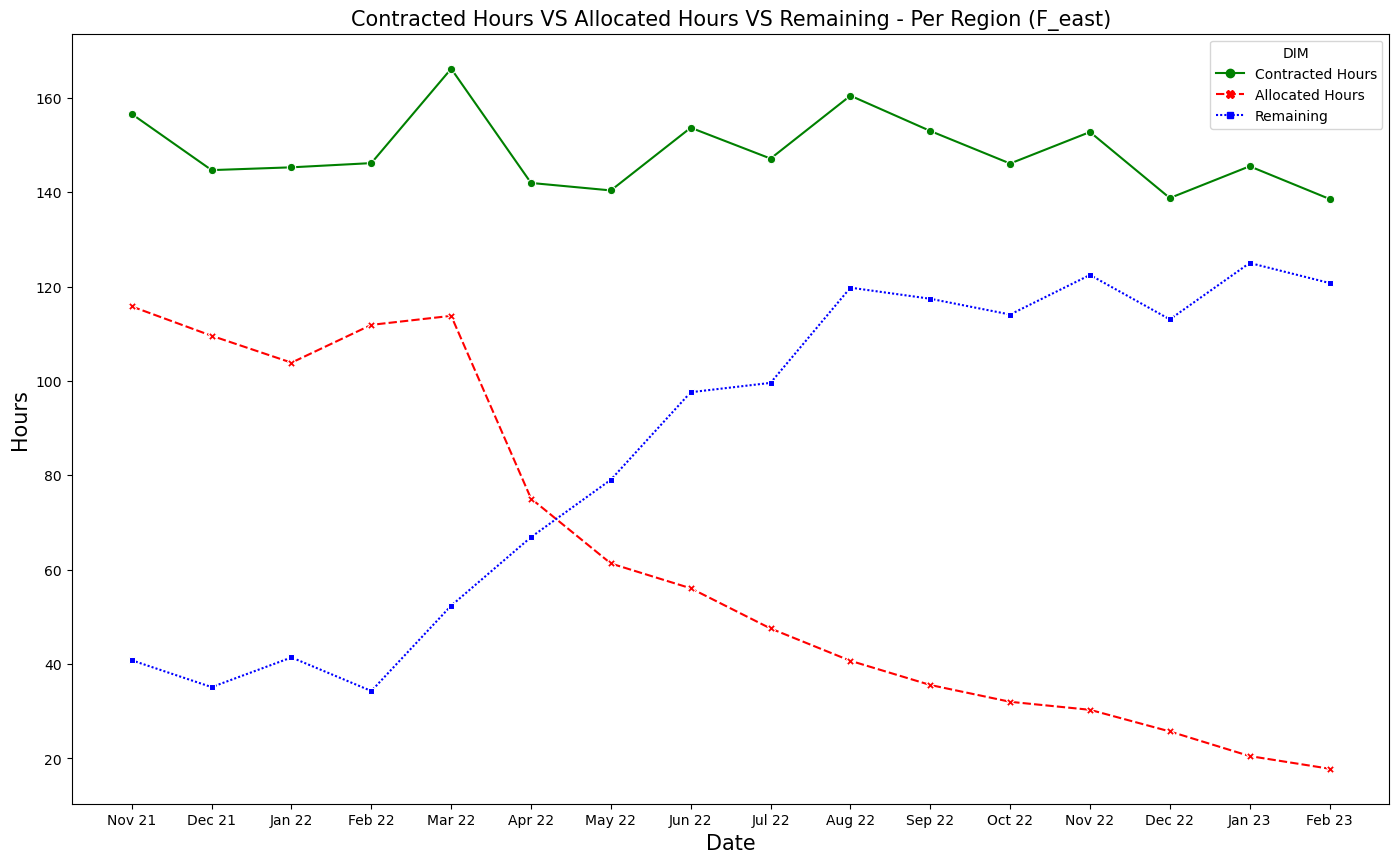

In [198]:
#Plotting the difference
plt.figure(figsize=(17,10))
F_east_Merged_Plot = sns.lineplot(F_east_Merged.T, palette=['green', 'red', 'blue'], markers=True)
F_east_Merged_Plot.set_title("Contracted Hours VS Allocated Hours VS Remaining - Per Region (F_east)", size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Hours', size=15)

In [199]:
#Count of employees in the region
print('The total Number of Employees is', F_east.reset_index()['EMP'].nunique())
print('The average Contracted hours over all months is ', round(F_east_Merged.T['Contracted Hours'].mean()))
print('The average Allocated hours over all months is ', round(F_east_Merged.T['Allocated Hours'].mean()))

The total Number of Employees is 270
The average Contracted hours over all months is  149
The average Allocated hours over all months is  62


#### **Findings** 
- Based on the analysis of the F_east region, it appears that the region experiences the same pattern as the AF, MEA, MER, CSE, and Subsaharan regions in terms of a small gap between the average contracted and allocated hours in the first five months, followed by a significant drop after month 5. The region has an average allocated hours of 62 per employee over all months, compared to an average contracted hours of 149 per employee over all months.

- The sudden drop in allocated hours after month 5 in the F_east region, similar to the other regions analyzed, suggests that the region may have experienced a sudden change in customer demand or workload patterns.





---


## **Data Analysis:** Conclusion

Based on the analysis of the 8 regions **(Lat_Pa, Central_USA, AF, MEA, MER, CSE, Subsaharan, and F_east)**, the following data-driven actionable insights can be drawn:

- All regions exhibit a significant gap between contracted and allocated hours, with the contracted hours being much higher than the allocated hours. This suggests that the business may be overstaffed, and it may benefit from conducting regular reviews of staffing needs to optimize staffing levels and improve efficiency while controlling labor costs.

- The initial small gap between the contracted and allocated hours in the first five months in some regions may be due to factors such as more accurate workload forecasting or efficient staffing policies. However, the sudden drop in allocated hours after month 5 in certain regions suggests that changes in customer demand or workload patterns may be affecting the business's staffing needs.

- The analysis underscores the need for the business to implement a more flexible staffing model that allows for the allocation of hours based on demand fluctuations. By doing so, the business can ensure that it is providing high-quality service to its customers while controlling labor costs and maximizing profitability.

- By optimizing staffing levels and improving efficiency in all regions, the business can maintain a competitive edge in the market and provide high-quality service to its customers.


### **Actionable Insights:**

- Conduct regular reviews of staffing needs to optimize staffing levels and improve efficiency while controlling labor costs.
- Implement a more flexible staffing model that allows for the allocation of hours based on demand fluctuations.
- Maintain a balance between contracted and allocated hours to ensure that staffing needs are being met effectively while also controlling labor costs.